In [180]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install scipy
#!pip install openpyxl

#!pip install mathjax


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import optimize

import scipy as sp

plt.rcParams['text.usetex'] = True

In [181]:
def func_divide(x,y):
    a = len(x)
    q= np.zeros(a)
    for i in range(a):
        q[i] = x[i] / y[i]
    return q

### 5.1

In [182]:
Messwerte = pd.read_excel (r'V8 Brennstoffzelle.xlsx', sheet_name='5.1')
print (Messwerte)

          I      U
0   0.61400  3.510
1   0.55900  3.480
2   0.50500  3.443
3   0.40200  3.380
4   0.25800  3.288
5   0.18400  3.233
6   0.10800  3.164
7   0.98800  3.712
8   1.35900  3.880
9   1.50000  3.930
10  1.40300  3.880
11  1.20200  3.760
12  1.00400  3.710
13  1.01400  3.680
14  0.88900  3.620
15  0.73800  3.548
16  0.47800  3.405
17  0.38400  3.352
18  0.03970  3.138
19  0.03314  3.062
20  0.00920  2.988
21  1.08900  3.712
22  1.30100  3.859
23  0.80100  3.589
24  0.68200  3.525


In [183]:
IU = Messwerte.to_numpy()
IU[:, 0]= IU[:, 0] * 1000
IU

array([[ 614.   ,    3.51 ],
       [ 559.   ,    3.48 ],
       [ 505.   ,    3.443],
       [ 402.   ,    3.38 ],
       [ 258.   ,    3.288],
       [ 184.   ,    3.233],
       [ 108.   ,    3.164],
       [ 988.   ,    3.712],
       [1359.   ,    3.88 ],
       [1500.   ,    3.93 ],
       [1403.   ,    3.88 ],
       [1202.   ,    3.76 ],
       [1004.   ,    3.71 ],
       [1014.   ,    3.68 ],
       [ 889.   ,    3.62 ],
       [ 738.   ,    3.548],
       [ 478.   ,    3.405],
       [ 384.   ,    3.352],
       [  39.7  ,    3.138],
       [  33.14 ,    3.062],
       [   9.2  ,    2.988],
       [1089.   ,    3.712],
       [1301.   ,    3.859],
       [ 801.   ,    3.589],
       [ 682.   ,    3.525]])

Text(0, 0.5, '$I$ in $mA$')

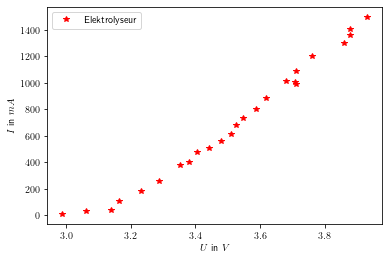

In [184]:
plt.plot(IU[:, 1], IU[:, 0], '*r', label = 'Elektrolyseur')

plt.legend()

plt.xlabel('$U$ in $V$')
plt.ylabel('$I$ in $mA$')

### 5.2

In [185]:
Messwerte = pd.read_excel (r'V8 Brennstoffzelle.xlsx', sheet_name='5.2')
print (Messwerte)


     I      U      t  V0  VE
0  0.3  3.274   62.5   8  18
1  0.3  3.240  211.5   4  20
2  0.3  3.247  202.1   4  20
3  0.3  3.271  210.6   4  20
4  0.8  3.576   73.9   5  21
5  0.8  3.511   73.9   4  20
6  0.8  3.531   74.9   4  20
7  1.3  3.776   59.6   7  28
8  1.3  3.745   61.6   5  26
9  1.3  3.750   60.0   7  28


In [186]:
IUtV0VE= Messwerte.to_numpy()

In [187]:
V_experiment = IUtV0VE[:, 4] - IUtV0VE[:, 3]
V_experiment

array([10., 16., 16., 16., 16., 16., 16., 21., 21., 21.])

In [188]:
p = 760 / 1013.15 * 744.6
T = 24  + 273.15

In [189]:
def func_V_theoretisch(I, t, T, p):
    return np.multiply(I,  t) * 8.314 * T / ( 96485 * 2 * p) 

In [190]:
V_theoretisch = func_V_theoretisch(IUtV0VE[:, 0], IUtV0VE[:, 2], T, p) * 10**(6) #umgerechnet in cm^3
V_theoretisch 

array([ 429.76827635, 1454.33584717, 1389.69869841, 1448.14718399,
       1355.08802655, 1355.08802655, 1373.42480634, 1775.91712276,
       1835.51165708, 1787.83602962])

In [191]:
eta_Faraday = np.divide(V_experiment, V_theoretisch)
eta_Faraday * 100 # in Prozent

array([2.32683531, 1.10015854, 1.1513287 , 1.10486007, 1.1807351 ,
       1.1807351 , 1.16497095, 1.18248761, 1.14409516, 1.17460436])

In [192]:
Heizwert = ( 11920 - 12770 ) / 20 * T

eta_Energie = Heizwert * np.divide( V_experiment * 10**(-6) , np.multiply(np.multiply(IUtV0VE[:, 0], IUtV0VE[:, 1]),  IUtV0VE[:, 2]) )
eta_Energie

array([-0.00205724, -0.0009829 , -0.0010264 , -0.00097774, -0.00095577,
       -0.00097346, -0.00095503, -0.00090649, -0.00088432, -0.00090669])

### 5.3

In [193]:
Messwerte = pd.read_excel (r'V8 Brennstoffzelle.xlsx', sheet_name='5.3')
print (Messwerte)

      R     I     U
0   0.1  0.71  1.10
1   0.2  8.00  1.80
2   0.5  7.46  4.20
3   0.7  7.35  5.60
4   1.0  7.05  7.60
5  10.0  6.64  7.24
6  20.0  6.62  7.88


In [194]:
RIU = Messwerte.to_numpy()

In [195]:
P = np.multiply(RIU[:, 1], RIU[:, 2])
P

array([ 0.781 , 14.4   , 31.332 , 41.16  , 53.58  , 48.0736, 52.1656])

Text(0, 0.5, '$P$ in $W$')

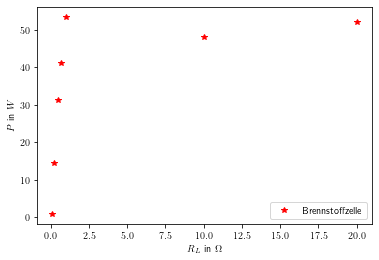

In [196]:
plt.plot(RIU[:, 0], P, '*r', label = 'Brennstoffzelle')

plt.legend()

plt.xlabel('$R_{L}$ in $\Omega$')
plt.ylabel('$P$ in $W$')

Text(0, 0.5, '$P$ in $W$')

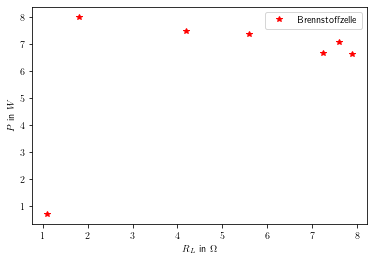

In [197]:
plt.plot(RIU[:, 2], RIU[:, 1], '*r', label = 'Brennstoffzelle')

plt.legend()

plt.xlabel('$R_{L}$ in $\Omega$')
plt.ylabel('$P$ in $W$')